In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [10]:
df = pd.read_csv("bnb.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382.0,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1.0,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835.0,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1.0,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354.0,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2.0,1
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271.0,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1.0,1
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963.0,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1.0,1


In [11]:
df.shape

(5080, 22)

In [12]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths'],
      dtype='object')

In [13]:
df['minimum_nights'].unique()

array([3.00e+01, 2.00e+00, 1.80e+02, 1.00e+00, 9.00e+01, 3.65e+02,
       7.00e+02, 3.10e+01, 6.00e+01, 7.50e+01, 3.00e+00, 5.00e+00,
       7.00e+00, 4.00e+00, 4.50e+01, 1.45e+02, 8.50e+01, 6.50e+01,
       6.00e+00, 1.00e+03, 3.50e+01, 3.60e+02, 2.00e+02, 4.00e+02,
       9.00e+00, 2.50e+02, 1.00e+02, 9.30e+01, 1.15e+02, 1.50e+01,
       1.90e+01, 4.00e+01, 3.30e+01, 6.40e+01, 3.00e+02, 9.50e+01,
       5.00e+02, 1.20e+02, 8.00e+01, 1.25e+03, 5.00e+01, 5.90e+01,
       3.64e+02, 2.50e+01,      nan])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5080 entries, 0 to 5079
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5080 non-null   float64
 1   name                            5080 non-null   object 
 2   host_id                         5079 non-null   float64
 3   host_name                       5079 non-null   object 
 4   neighbourhood_group             5079 non-null   object 
 5   neighbourhood                   5079 non-null   object 
 6   latitude                        5079 non-null   float64
 7   longitude                       5079 non-null   float64
 8   room_type                       5079 non-null   object 
 9   price                           5079 non-null   float64
 10  minimum_nights                  5079 non-null   float64
 11  number_of_reviews               5079 non-null   float64
 12  last_review                     50

In [15]:
df.isnull().sum()

,0
id,0
name,0
host_id,1
host_name,1
neighbourhood_group,1
neighbourhood,1
latitude,1
longitude,1
room_type,1
price,1


In [16]:
df['bedrooms'] = df['bedrooms'].apply(lambda x: None if x == 'Studio' else x)

# Drop NaNs from the DataFrame based on 'bedrooms' column
df = df.dropna(subset=['bedrooms'])

# Check unique values in 'bedrooms'
print(df['bedrooms'].unique())




['1' '2' '3' '6' '5' '4' '7' '15' '9']


In [17]:
# Filling missing values in the DataFrame 'df'

df['neighbourhood_group'].fillna('Manhattan', inplace=True)

df['latitude'].fillna(df['latitude'].mode()[0], inplace=True)
df['longitude'].fillna(df['longitude'].mode()[0], inplace=True)

df['room_type'].fillna('Entire home/apt', inplace=True)  # removed extra tab character

df['price'].fillna(df['price'].mean(), inplace=True)

df['minimum_nights'].fillna(df['minimum_nights'].mode()[0], inplace=True)
df['availability_365'].fillna(df['availability_365'].mode()[0], inplace=True)
df['number_of_reviews_ltm'].fillna(df['number_of_reviews_ltm'].mode()[0], inplace=True)
df['calculated_host_listings_count'].fillna(df['calculated_host_listings_count'].mode()[0], inplace=True)
df['number_of_reviews'].fillna(df['number_of_reviews'].mode()[0], inplace=True)
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(),inplace=True)
df['last_review'].dropna(inplace=True)
df['neighbourhood'].fillna("Bedford-Stuyvesant",inplace=True)


<ipython-input-17-a2fe306fd4ff>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['neighbourhood_group'].fillna('Manhattan', inplace=True)
<ipython-input-17-a2fe306fd4ff>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [18]:
df.dropna(subset=['last_review'],inplace=True)

In [19]:
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.dtypes

,0
id,float64
name,object
host_id,float64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


In [22]:
df.baths.unique()

array(['Not specified', '1', '2', '1.5', '3', '4', '3.5', '0', '2.5', '5',
       '4.5', '6', '5.5'], dtype=object)

In [23]:
df['availability_365'] = df['availability_365'].astype(int)
df['id'] = df['id'].astype(int)
df['number_of_reviews_ltm'] = df['number_of_reviews_ltm'].astype(int)
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].astype(int)
df['reviews_per_month'] = df['reviews_per_month'].astype(int)
df['number_of_reviews'] = df['number_of_reviews'].astype(int)
df['price'] = df['price'].astype(int)
df.minimum_nights = df.minimum_nights.astype(int)
df['bedrooms'] = df['bedrooms'].astype(int)

In [24]:
df.dtypes

,0
id,int64
name,object
host_id,float64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


# **Univariate Analysis**

**Basically it is used to analyze the distribution of each feature**


In [25]:
#Analyze the price

In [26]:
df['price']

,price
0,55
1,144
2,187
3,120
5,115
...,...
5074,51
5075,109
5076,325
5077,800


# **Identify outliers**

<Axes: xlabel='price'>

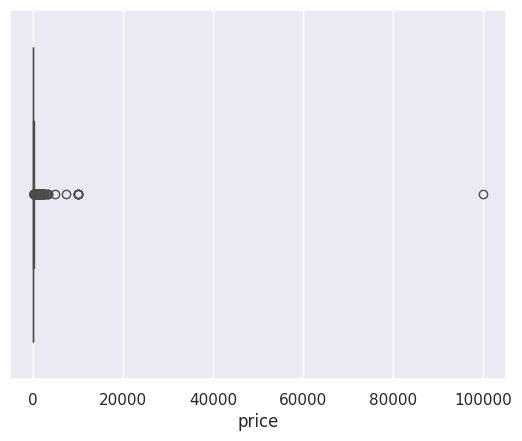

In [27]:
sns.boxplot(data=df , x='price')

In [28]:
df = df[df['price']<1500]

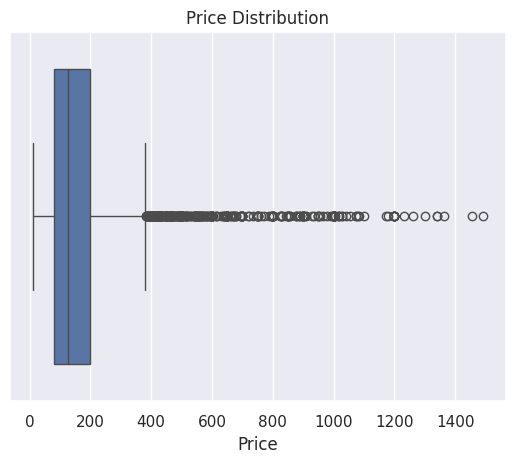

In [29]:
sns.boxplot(data=df,x='price')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.show()

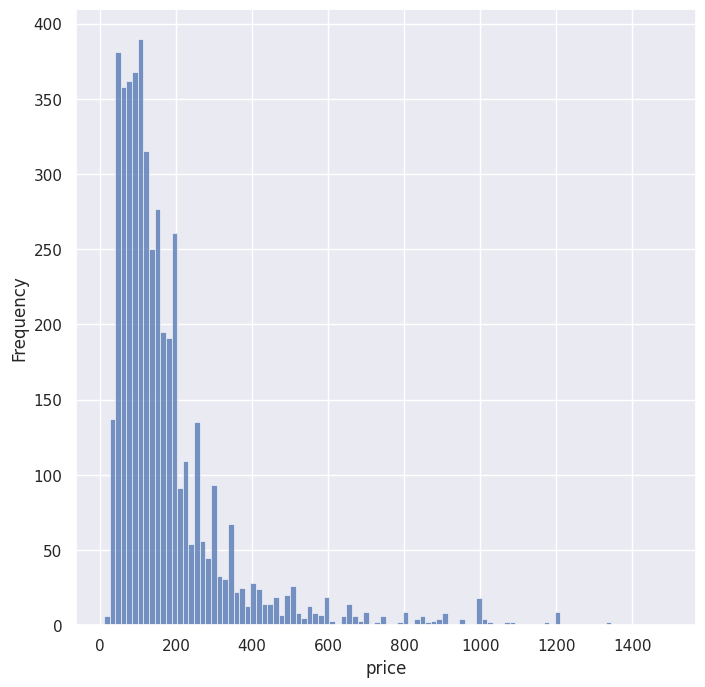

In [30]:
plt.figure(figsize=(8,8))
sns.histplot(df['price'],bins=100)
plt.ylabel("Frequency")
plt.xlabel("price")
plt.show()

Text(0.5, 0, 'longitude')

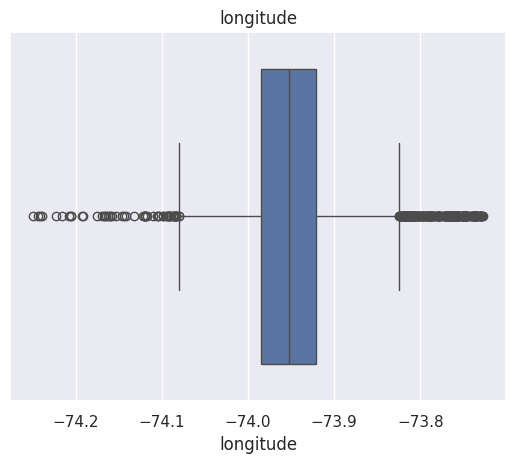

In [31]:
sns.boxplot(data=df,x='longitude')
plt.title("longitude")
plt.xlabel("longitude")

Text(0.5, 0, 'latitude')

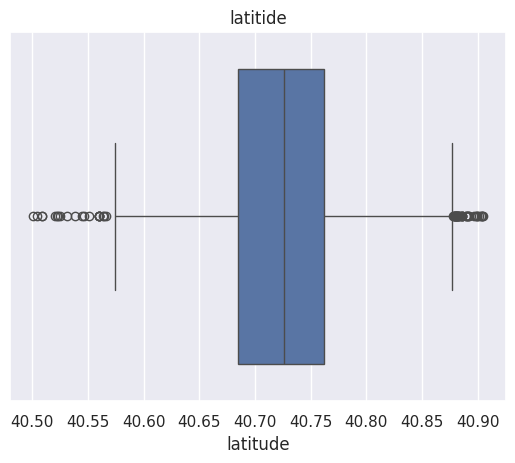

In [32]:
sns.boxplot(data=df,x='latitude')
plt.title("latitide")
plt.xlabel("latitude")

Text(0.5, 1.0, 'bedrooms')

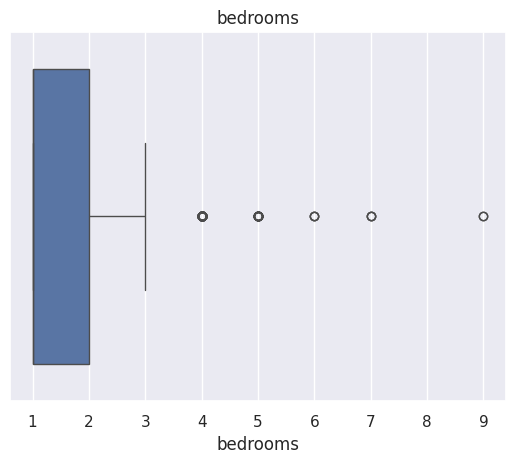

In [33]:
sns.boxplot(data=df,x='bedrooms')
plt.title("bedrooms")


In [34]:
df = df[df['bedrooms']<5]

# **Bivariate**

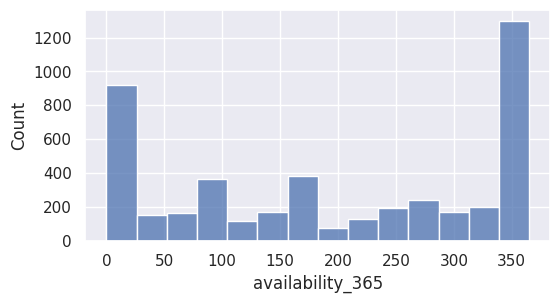

In [35]:
plt.figure(figsize=(6,3))
sns.histplot(data=df,x='availability_365')
plt.show()

# **Feature Engineering**

In [36]:
df.groupby(by='neighbourhood_group')['price'].mean()

,price
neighbourhood_group,
Bronx,99.932039
Brooklyn,145.544676
Manhattan,233.824182
Queens,121.831418
Staten Island,141.944444


In [37]:
df['price_per_bed'] = df['price']/df['beds']

# **BI variable analysis**

One Variable dependency in other variable

In [39]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,price_per_bed
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382.0,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55,...,0,1,0,0,No License,5,1,1.0,Not specified,55.0
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835.0,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144,...,0,139,364,2,No License,4.67,2,1.0,1,144.0
2,971000000000000000,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354.0,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187,...,1,1,343,6,Exempt,4.17,1,2.0,1,93.5
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271.0,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120,...,1,2,363,12,No License,4.64,1,1.0,1,120.0
5,49584983,Rental unit in New York · ★5.0 · 1 bedroom · 1...,51501835.0,Jeniffer,Manhattan,Hell's Kitchen,40.759950,-73.992960,Entire home/apt,115,...,0,139,276,2,No License,5,1,1.0,1,115.0


In [38]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths', 'price_per_bed'],
      dtype='object')

Text(0.5, 1.0, 'Price VS Neighbourhood_group')

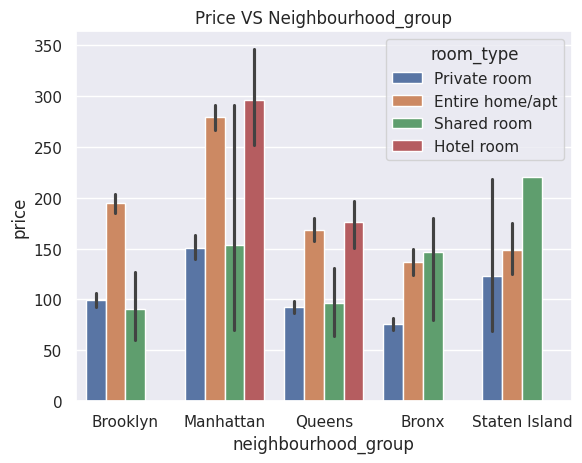

In [44]:
sns.barplot(data=df,x='neighbourhood_group',y='price',hue='room_type')
plt.title("Price VS Neighbourhood_group")

Text(0.5, 1.0, 'Price VS number_of_reviews')

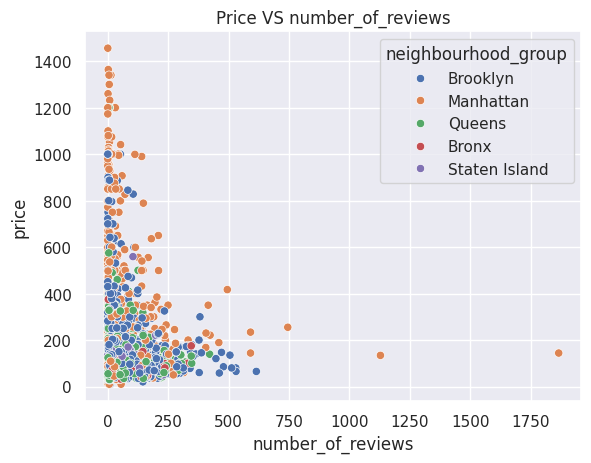

In [50]:
sns.scatterplot(data=df,x='number_of_reviews',y='price',hue='neighbourhood_group')
plt.title("Price VS number_of_reviews")

In [53]:
df.dtypes

,0
id,int64
name,object
host_id,float64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


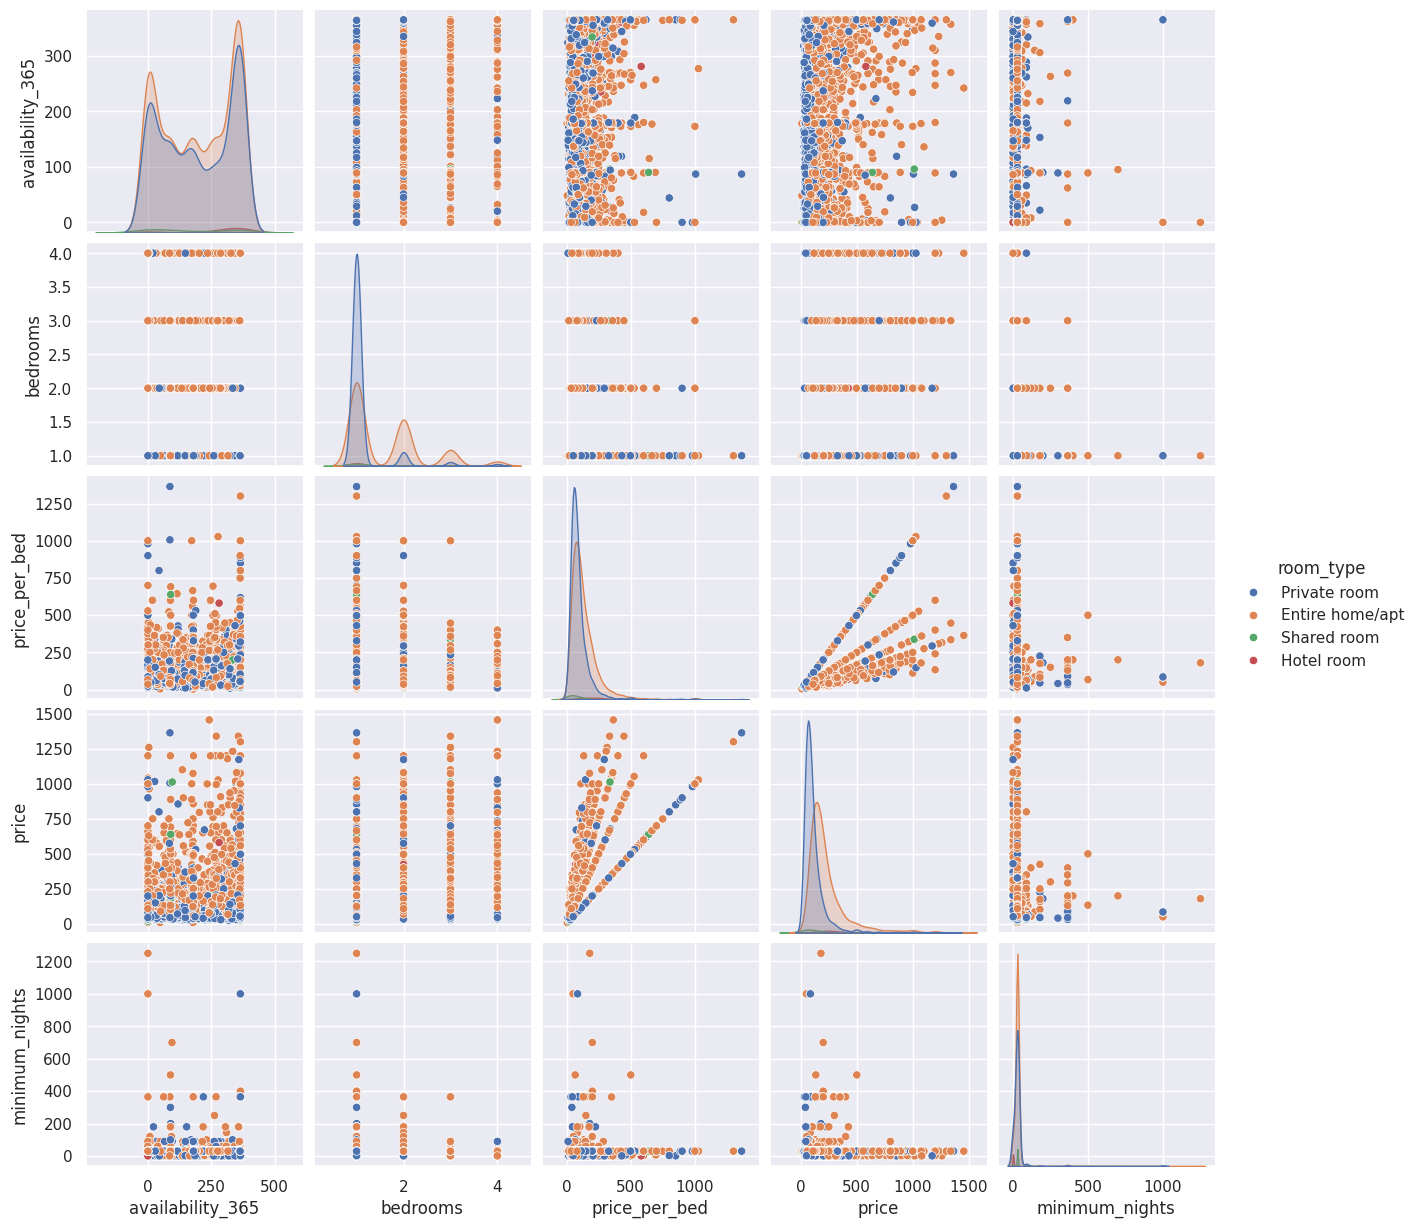

In [54]:
sns.pairplot(data=df,vars=['availability_365','bedrooms','price_per_bed','price','minimum_nights'],hue='room_type')

In [ ]:
"""
pariplot,histplot,barplot,scatterplot
"""

Text(0.5, 1.0, 'Geographical Distribution')

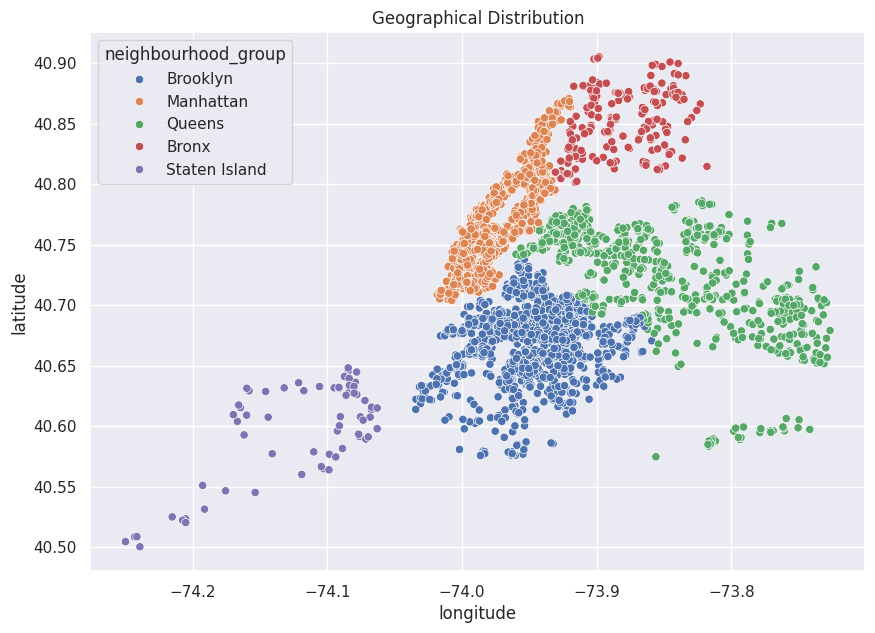

In [57]:
#geographical distributions
plt.figure(figsize=(10,7))
sns.scatterplot(data=df,x='longitude',y='latitude',hue='neighbourhood_group')
plt.title("Geographical Distribution")

In [58]:
df.dtypes

,0
id,int64
name,object
host_id,float64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


In [62]:
#heatmap chart for other numerical columns
cor=df[['availability_365','bedrooms','price_per_bed','price','minimum_nights']].corr()
cor

,availability_365,bedrooms,price_per_bed,price,minimum_nights
availability_365,1.000000,0.084525,0.008551,0.070019,0.015819
bedrooms,0.084525,1.000000,-0.043247,0.445148,-0.020564
price_per_bed,0.008551,-0.043247,1.000000,0.712059,-0.018388
price,0.070019,0.445148,0.712059,1.000000,-0.040536
minimum_nights,0.015819,-0.020564,-0.018388,-0.040536,1.000000


<Axes: >

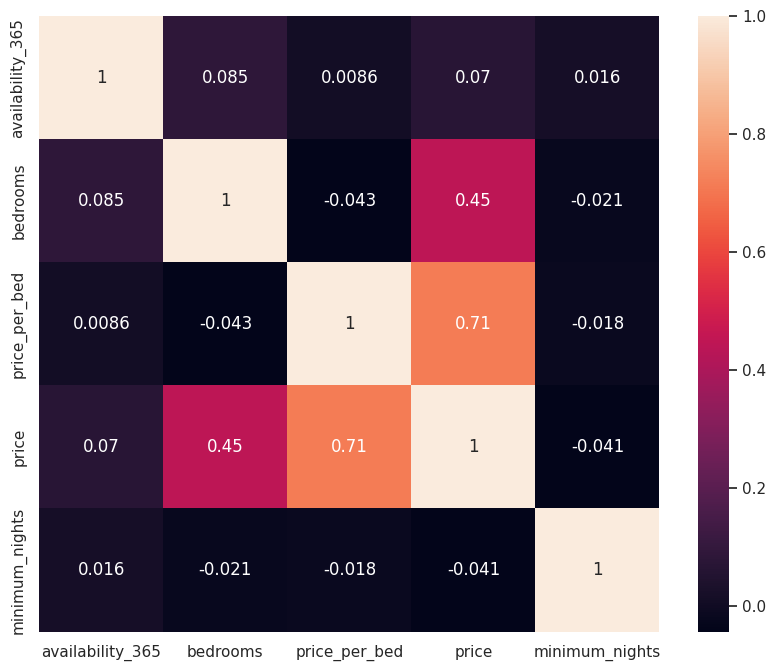

In [66]:
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True)